## Lab 1: Getting data from API's

**1. Practice writing queries using the saferproducts.gov API and your web browser.**

*   "https://www.saferproducts.gov/RestWebServices/Recall?format=json&RecallID=7856"
  *   returns the recall information specifically for Recall ID 7856.

*   https://www.saferproducts.gov/RestWebServices/Recall?format=json&ProductType=Phone&RecallDateStart=2016-01-01&RecallDateEnd=2016-12-31
  *   to get all phone recalls between January 1, 2016, and December 31, 2016


* https://www.saferproducts.gov/RestWebServices/Recall?format=json&Hazard=Fire
  * Recalls related to specific hazard Fire

* https://www.saferproducts.gov/RestWebServices/Recall?format=json&ManufacturerCountry=China
  * Recalls for products manufactured in China

* https://www.saferproducts.gov/RestWebServices/Recall?format=json&Injury=overheating
  * Where injury = overheating

* https://www.saferproducts.gov/RestWebServices/Recall?format=json&Remedy=Replace
  * Where remedy for product is to replace

* https://www.saferproducts.gov/RestWebServices/Recall?format=json&Description=Charger
  * Recalls by product description that mentions charger





**2. Practice with the saferproducts.gov API and the above code in a notebook to see how API's work, in general.**

In [1]:
import urllib.request
import json
url = 'https://www.saferproducts.gov/RestWebServices/' # Location of the API
query = 'Recall?format=json&Injury=Overheating' # The query
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes) # Convert response to json
response.close()

import pickle
with open('data.pkl', 'wb') as f:
    pickle.dump(data, f)

# print(data)

url = 'https://www.saferproducts.gov/RestWebServices/' # Location of the API
query = 'Recall?format=json&ProductType=Exercise' # The query
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes) # Convert response to json
response.close()

# print(data)
import pickle
with open('data.pkl', 'wb') as f:
    pickle.dump(data, f)




**3. Convert this code chunk into a function you can reuse to flatten dictionaries, or explain clearly the problems you run into while attempting to do so. Make some tables or plots.**




In [6]:
import pandas as pd

df = pd.DataFrame.from_dict(data)
print(df['RemedyOptions'].value_counts())

def flatten_dictionary_column(df, column_name):
  clean_values = []

  for i in range(len(df[column_name])):
    if len(df[column_name][i])>0:
      values = []
      for j in range(len(df[column_name][i])):
        values.append(df[column_name][i][j]['Option'] )
      clean_values.append(','.join(values))
    else:
      clean_values.append('')
  df[f'flattened_{column_name}'] = clean_values
  return df

print(df.shape)
print(df.head())
print(df.columns)



RemedyOptions
[]                                                        66
[{'Option': 'Repair'}]                                     9
[{'Option': 'Replace'}]                                    8
[{'Option': 'Refund'}]                                     5
[{'Option': 'Replace'}, {'Option': 'Refund'}]              1
[{'Option': 'Refund'}, {'Option': 'Repair'}]               1
[{'Option': 'New Instructions'}, {'Option': 'Repair'}]     1
Name: count, dtype: int64
(91, 22)
   RecallID RecallNumber           RecallDate  \
0      7832        16247  2016-08-23T00:00:00   
1      6724        16742  2016-05-10T00:00:00   
2      6488        15749  2015-08-25T00:00:00   
3      6420        15735  2015-06-16T00:00:00   
4      6398        15140  2015-05-20T00:00:00   

                                         Description  \
0  This recall involves "Step-iT" activity wristb...   
1  This recall involves the Olympic Decline free ...   
2  This recall involves four models of exercise m...   
3  Th

(91, 23)
   RecallID RecallNumber           RecallDate  \
0      7832        16247  2016-08-23T00:00:00   
1      6724        16742  2016-05-10T00:00:00   
2      6488        15749  2015-08-25T00:00:00   
3      6420        15735  2015-06-16T00:00:00   
4      6398        15140  2015-05-20T00:00:00   

                                         Description  \
0  This recall involves "Step-iT" activity wristb...   
1  This recall involves the Olympic Decline free ...   
2  This recall involves four models of exercise m...   
3  This recall involves the Rogue Fitness Mobilit...   
4  This recall involves Valor Fitness BF-38 Flat/...   

                                                 URL  \
0  https://www.cpsc.gov/Recalls/2016/McDonalds-Re...   
1  https://www.cpsc.gov/Recalls/2016/Cybex-Intern...   
2  https://www.cpsc.gov/Recalls/2015/Cybex-Intern...   
3  https://www.cpsc.gov/Recalls/2015/Coulter-Vent...   
4  https://www.cpsc.gov/Recalls/2015/Valor-Athlet...   

                      

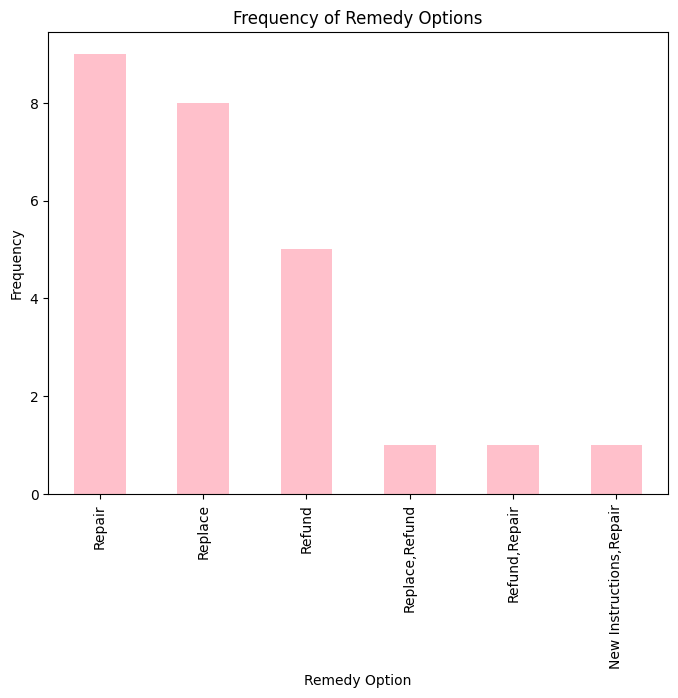

In [7]:
import matplotlib.pyplot as plt

# Flatten all remedy options into a single list

df = flatten_dictionary_column(df, 'RemedyOptions')

print(df.shape)
print(df.head())
all_remedies = [item for sublist in df['flattened_RemedyOptions'].str.split(', ') for item in sublist if item]
print(all_remedies)

# Create a bar plot representing frequency of remedy options
plt.figure(figsize=(8, 6))
pd.Series(all_remedies).value_counts().plot(kind='bar', color='pink')
plt.title('Frequency of Remedy Options')
plt.xlabel('Remedy Option')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Create a frequency table
frequency_table = pd.Series(all_remedies).value_counts().reset_index()
frequency_table.columns = ['Remedy Option', 'Count']

# Add a percentage column
total_remedies = frequency_table['Count'].sum()
frequency_table['Percentage'] = (frequency_table['Count'] / total_remedies) * 100

# Display
print(frequency_table)

             Remedy Option  Count  Percentage
0                   Repair      9        36.0
1                  Replace      8        32.0
2                   Refund      5        20.0
3           Replace,Refund      1         4.0
4            Refund,Repair      1         4.0
5  New Instructions,Repair      1         4.0



**4. Produce your own table or plot, and output it to streamlit.**

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


## Other API Sources

Valuable and interesting Federal API resources are listed at:

    https://catalog.data.gov/dataset/?_res_format_limit=0&res_format=API

and in the future will likely easily be found at \texttt{data.gov}. Some highlights include:

- CDC WONDER API for Data Query Web Service: Includes death certificates with causes since approximately the 1990's.
- Comprehensive Housing Affordability Strategy (CHAS): Housing and Urban Development (HUD) maintains an API that provides Census data on housing problems and needs unavailable through other sources, including IPUMS.
- Federal Election Commission API: Provides historical and up to the minute campaign finance data.
- Toxic Release Inventory: Provided by the Environmental Protection Agency, this API documents the release and management of over 800 toxic substances, reported annually by privately owned facilities and the government.
- Petroleum Data, Prices: Provides prices of petroleum products and crude oil at weekly, monthly, and yearly time scales.
- Fair Market Rents Lookup tool: Fair Market Rents (FMRs) determine the value of housing vouchers for Section 8 renters. This API provides the FMR values and other measures of housing affordability.
- Annual Economic Surveys, Business Patterns: Surveys of businesses at the zip code level, tracking economic sentiment and activity.
- Food Access Research Atlas: Provides spatial data on food access and the availability of supermarkets within census tracts. Can be merged with census data to look at under-served populations and food deserts.
- National Oceanographic and Atmospheric Administration: Provides API access to data on real time weather and climate change projections.

Each of these API resources could either be the cornerstone of a project or a source of additional data. These data sources have a number of advantages: They're free, most of them can be accessed using the same API key, and most have similar documentation for how to write a query. This is ideal for students to iterate, experiment, and take risks, with little cost to failure.

In addition to government data, many commerical apps provide API access to developers and researchers. AirBnB, Amazon, Reddit, eBay, X, and many others maintain API access to develop third-party apps. These opportunities present many advantages: The data are larger, have more variety, and there are vastly many more cases. Building a third-party app that includes analytics could easily consume an entire semester and open a variety of applications in predictive analytics, natural language processing, and generative AI (e.g. predict which reviews are fake or real for Amazon for a product group like ``women's watches', and then make recommendations for different price points). While an exciting possibility, this can also raise a lot of problems: Some API's cost money or are rate-limited depending on a subscription, and others impose significant constraints on how the data can be used. In some cases, a more useful approach might be explicit web scraping using a package like BeautifulSoup or Selenium. For example, Craigslist has no API, but can easily and productively be scraped using BeautifulSoup.

**5. Pick an API, download some data, wrangle them, and produce some EDA results, as we did in the previous steps with the saferproducts.gov API; or, if you can't get it to work, document why. If you have the time and it's low cost, push the results to a streamlit page. If you have had enough, I recommend https://www.eia.gov/opendata/browser/electricity, since there is a friendly query builder that you can use to learn.**

In [22]:
api_key = 'NcqZdYBer2T5q4Wt1AbyqdEcAqmaG0gaJRiFpDNH'
url = 'https://api.eia.gov/v2/coal/price-by-rank/data/' # Location of the API
query = f'?api_key={api_key}&frequency=annual&data[0]=price&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'

response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes) # Convert response to json
response.close()

print(data.keys())

dict_keys(['response', 'request', 'apiVersion', 'ExcelAddInVersion'])


In [10]:
# Extract relevant data

coalRankDescription = [item['coalRankDescription'] for item in data['response']['data']]
print(coalRankDescription)


['All', 'Subbituminous', 'Lignite', 'Bituminous', 'Anthracite', 'All', 'Subbituminous', 'Lignite', 'Bituminous', 'All', 'Lignite', 'Bituminous', 'Anthracite', 'All', 'Subbituminous', 'Lignite', 'Bituminous', 'All', 'Lignite', 'Bituminous', 'All', 'Lignite', 'Bituminous', 'All', 'Bituminous', 'Anthracite', 'All', 'Subbituminous', 'Lignite', 'Bituminous', 'All', 'Subbituminous', 'Bituminous', 'All', 'Subbituminous', 'All', 'Subbituminous', 'Lignite', 'Bituminous', 'All', 'Lignite', 'Bituminous', 'All', 'Bituminous', 'All', 'Lignite', 'Bituminous', 'All', 'Bituminous', 'All', 'Bituminous', 'Anthracite', 'All', 'Bituminous', 'All', 'Bituminous', 'Anthracite', 'All', 'Subbituminous', 'All', 'Subbituminous', 'All', 'Subbituminous', 'Bituminous', 'All', 'Bituminous', 'All', 'Subbituminous', 'Bituminous', 'All', 'Subbituminous', 'Lignite', 'Bituminous', 'All', 'Subbituminous', 'Bituminous', 'All', 'Subbituminous', 'Lignite', 'Bituminous', 'All', 'Lignite', 'All', 'Lignite', 'All', 'Lignite', '

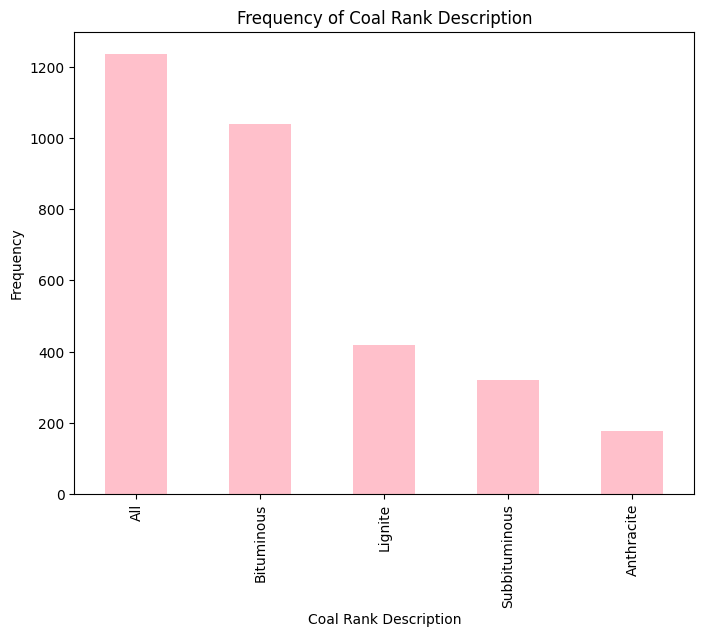

In [11]:
plt.figure(figsize=(8, 6))
pd.Series(coalRankDescription).value_counts().plot(kind='bar', color='pink')
plt.title('Frequency of Coal Rank Description')
plt.xlabel('Coal Rank Description')
plt.ylabel('Frequency')
plt.show()



In [17]:
frequency_table = pd.Series(coalRankDescription).value_counts()
coal_rank_series = pd.Series(coalRankDescription)

frequency_counts = coal_rank_series.value_counts()

frequency_percentages = (frequency_counts / frequency_counts.sum()) * 100

# Combine counts and percentages into a DataFrame
frequency_table = pd.DataFrame({
    'Count': frequency_counts,
    'Percentage': frequency_percentages
})

# Print the frequency table
print(frequency_table)

               Count  Percentage
All             1237   38.789589
Bituminous      1039   32.580746
Lignite          418   13.107557
Subbituminous    319   10.003136
Anthracite       176    5.518971


In [18]:
print((coal_rank_series).value_counts())

All              1237
Bituminous       1039
Lignite           418
Subbituminous     319
Anthracite        176
Name: count, dtype: int64
